## 병합 데이터(항공 데이터 + 기상 데이터) 분석
---
### 시각화 기본 패키지 & 데이터 불러오기

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.font_manager as fm
import seaborn as sns
import numpy as np

# 폰트 설정
font_path = "C:/Windows/Fonts/malgunbd.ttf"
font = fm.FontProperties(fname = font_path).get_name()
plt.rc('font', family = font)


In [2]:
# 데이터 불러오기
data = pd.read_csv("C:/Data/data.csv")
data

,풍향,풍속,시정,전운량,최저운고,기온,강수량,적설,신적설,현황
0,3,4,1000,4,25,1.4,0,0,0,0
1,33,5,1000,7,25,2.5,0,0,0,0
2,31,6,1000,2,25,3.7,0,0,0,0
3,32,6,1000,3,25,3.8,0,0,0,0
4,30,8,1000,7,25,4.2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
72335,27,7,1000,0,180,15.3,0,0,0,0
72336,14,2,800,0,40,13.0,0,0,0,0
72337,36,10,600,7,15,1.3,0,22,22,0
72338,33,11,120,7,15,0.6,0,25,25,0


In [3]:
data = data.apply(pd.to_numeric, errors = 'coerce').fillna(0)
data

,풍향,풍속,시정,전운량,최저운고,기온,강수량,적설,신적설,현황
0,3,4,1000,4,25,1.4,0,0,0,0
1,33,5,1000,7,25,2.5,0,0,0,0
2,31,6,1000,2,25,3.7,0,0,0,0
3,32,6,1000,3,25,3.8,0,0,0,0
4,30,8,1000,7,25,4.2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
72335,27,7,1000,0,180,15.3,0,0,0,0
72336,14,2,800,0,40,13.0,0,0,0,0
72337,36,10,600,7,15,1.3,0,22,22,0
72338,33,11,120,7,15,0.6,0,25,25,0


In [4]:
cancel = data[data.현황 == 1]
cancel

,풍향,풍속,시정,전운량,최저운고,기온,강수량,적설,신적설,현황
71764,1,7,800,8,25,22.2,0,0,0,1
71765,14,3,1000,2,35,12.6,0,0,0,1
71766,32,6,1000,0,30,14.7,0,0,0,1
71767,36,5,1000,2,200,15.2,0,0,0,1
71768,35,4,1000,3,200,15.3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
72318,33,15,1000,7,10,1.4,0,0,0,1
72319,34,13,1000,8,25,8.2,0,0,0,1
72320,31,18,500,7,10,0.6,0,84,84,1
72321,33,17,200,7,10,-1.8,0,30,30,1


In [25]:
flight = data[data.현황 == 0]
flight 

,풍향,풍속,시정,전운량,최저운고,기온,강수량,적설,신적설,현황
0,3,4,1000,4,25,1.4,0,0,0,0
1,33,5,1000,7,25,2.5,0,0,0,0
2,31,6,1000,2,25,3.7,0,0,0,0
3,32,6,1000,3,25,3.8,0,0,0,0
4,30,8,1000,7,25,4.2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
72335,27,7,1000,0,180,15.3,0,0,0,0
72336,14,2,800,0,40,13.0,0,0,0,0
72337,36,10,600,7,15,1.3,0,22,22,0
72338,33,11,120,7,15,0.6,0,25,25,0


### 기상 데이터 분포(범위) 확인
---
#### 풍향 데이터 분포

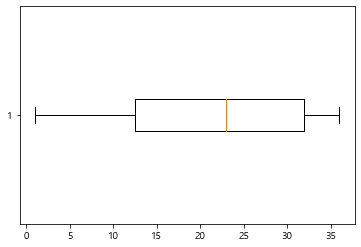

In [5]:
plt.boxplot(cancel.풍향, vert=0)
plt.show()

In [6]:
cancel.풍향.describe()

count    559.000000
mean      21.778175
std       10.176445
min        1.000000
25%       12.500000
50%       23.000000
75%       32.000000
max       36.000000
Name: 풍향, dtype: float64

풍향 데이터의 최소값은 1, 최대값은 36이고 Q1, Q2, Q3은 12, 23, 32로 나타났다. <br>
범위 : (1, 36)
* 이상치는 관측되지 않았다. 

#### 풍속 데이터 분포

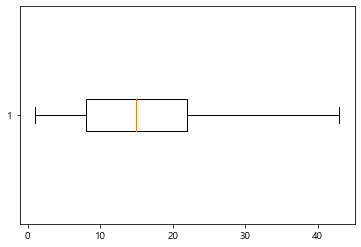

In [30]:
plt.boxplot(cancel.풍속, vert=0)
plt.show()

In [31]:
cancel.풍속.describe()

count    559.000000
mean      15.547406
std        8.443200
min        1.000000
25%        8.000000
50%       15.000000
75%       22.000000
max       43.000000
Name: 풍속, dtype: float64

풍속 데이터의 최소값은 1, 최대값은 43이다. Q1, Q2, Q3은 8, 15, 22로 나타났다. <br>
범위 : (1, 43)
* 이상치는 관측되지 않았다. 

#### 시정 데이터 분포

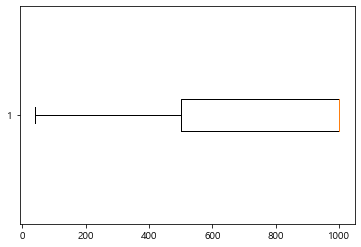

In [33]:
plt.boxplot(cancel.시정, vert=0)
plt.show()

In [34]:
cancel.시정.describe()

count     559.000000
mean      731.305903
std       322.607951
min        40.000000
25%       500.000000
50%      1000.000000
75%      1000.000000
max      1000.000000
Name: 시정, dtype: float64

시정 데이터의 최소값은 40, 최대값은 1000이다. 시정 데이터의 경우, 평소 맑을 때의 상태(특별한 이상 기상 현상이 없는 경우)에는 1000으로 나타나기 때문에 Q1, Q2, Q3이 500, 1000, 1000으로 나타났다. <br>
범위 : (40, 1000)
* 이상치는 관측되지 않았다.

#### 전운량 데이터 분포

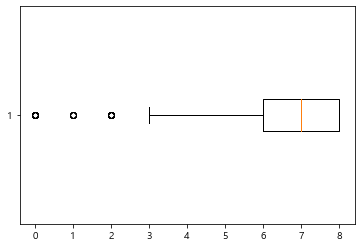

In [35]:
plt.boxplot(cancel.전운량, vert=0)
plt.show()

In [36]:
cancel.전운량.describe()

count    559.000000
mean       6.457961
std        2.051646
min        0.000000
25%        6.000000
50%        7.000000
75%        8.000000
max        8.000000
Name: 전운량, dtype: float64

전운량 데이터의 최소값은 0, 최대값은 8이다.  Q1, Q2, Q3은 6, 7, 8로 나타났다. <br>
범위 : (0, 8)
* 이상치가 3건 나타났지만, 이 분포 확인에서는 결항 데이터만을 사용했기 때문에 결항 시, 기상 특성으로 해석될 수 있다. 

#### 최저운고 데이터 분포

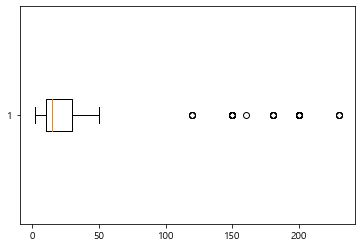

In [37]:
plt.boxplot(cancel.최저운고, vert=0)
plt.show()

In [38]:
cancel.최저운고.describe()

count    559.000000
mean      34.669052
std       51.081034
min        2.000000
25%       10.000000
50%       15.000000
75%       30.000000
max      230.000000
Name: 최저운고, dtype: float64

최저운고 데이터의 최소값은 2, 최대값은 230이다. Q1, Q2, Q3은 10, 15, 30이다. <br>
범위 : (2, 230)
* 이상치가 6건 나타났지만, 이 분포에서는 결항 데이터만을 사용했기 때문에 결항 발생 시, 기상 특성으로 해석될 수 있다.

#### 기온 데이터 분포

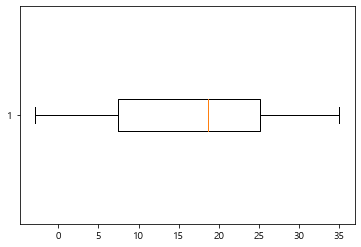

In [39]:
plt.boxplot(cancel.기온, vert=0)
plt.show()

In [40]:
cancel.기온.describe()

count    559.000000
mean      15.692129
std       10.445332
min       -2.900000
25%        7.400000
50%       18.600000
75%       25.100000
max       35.000000
Name: 기온, dtype: float64

기온 데이터의 최소값은 -2.9, 최대값은 35이다. Q1, Q2, Q3은 7.4, 18.6, 25.1로 나타났다. <br>
범위 : (-2.9, 35)
* 이상치는 관측되지 않았다. 

#### 강수량 데이터 분포

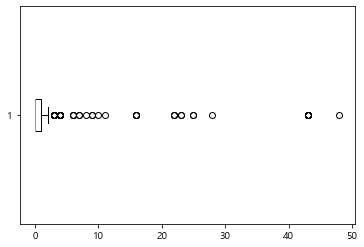

In [41]:
plt.boxplot(cancel.강수량, vert=0)
plt.show()

In [42]:
cancel.강수량.describe()

count    559.000000
mean       1.629696
std        6.065702
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max       48.000000
Name: 강수량, dtype: float64

강수량 데이터는 최소값이 0, 최대값이 48이다. Q1, Q2, Q3는 0, 0, 1로 나타났다. <br>
범위 : (0, 48)
* 이상치가 나타났지만, 이 분포에서는 결항 데이터만을 사용했기 때문에 결항 발생 시, 기상 특성으로 해석될 수 있다.

#### 적설 데이터 분포

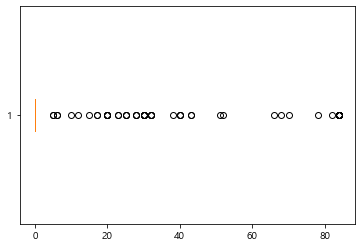

In [43]:
plt.boxplot(cancel.적설, vert=0)
plt.show()

In [44]:
cancel.적설.describe()

count    559.000000
mean       4.037567
std       14.745889
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       84.000000
Name: 적설, dtype: float64

적설 데이터의 최소값은 0, 최대값은 84이다. Q1, Q2, Q3은 0, 0, 0 으로 나타났다<br>
범위 : (0, 84)
* 이상치가 나타났지만, 이 분포에서는 결항 데이터만을 사용했기 때문에 결항 발생 시, 기상 특성으로 해석될 수 있다. 
* Q1, Q2, Q3가 모두 0으로 나타났기 때문에 이 데이터의 지역인 제주에는 눈이 내리는 빈도가 적다는 뜻으로 해석될 수 있다.

#### 신적설 데이터 분포

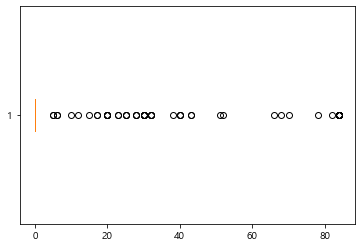

In [45]:
plt.boxplot(cancel.신적설, vert=0)
plt.show()

In [46]:
cancel.신적설.describe()

count    559.000000
mean       4.037567
std       14.745889
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       84.000000
Name: 신적설, dtype: float64

신적설 데이터의 최소값은 0, 최대값은 84이다. Q1, Q2, Q3은 0, 0, 0으로 나타났다. <br>
범위 : (0, 84)
* 이상치가 나타났지만, 이 분포에서는 결항 데이터만을 다루고 있기 때문에 결항 발생 시의 기상 특성으로 해석될 수 있다.
* Q1, Q2, Q3가 모두 0으로 나타났기 떄문에 이 데이터의 지역인 제주에는 눈이 내리는 빈도가 적다는 의미로 해석될 수 있다.

### 상관관계 히트맵
---
#### 풍향 데이터
* 출발한 항공편의 데이터를 상관관계 분석한 결과로는 정상 출발한 제주 지역의 기상 상황을 알 수 있다.  

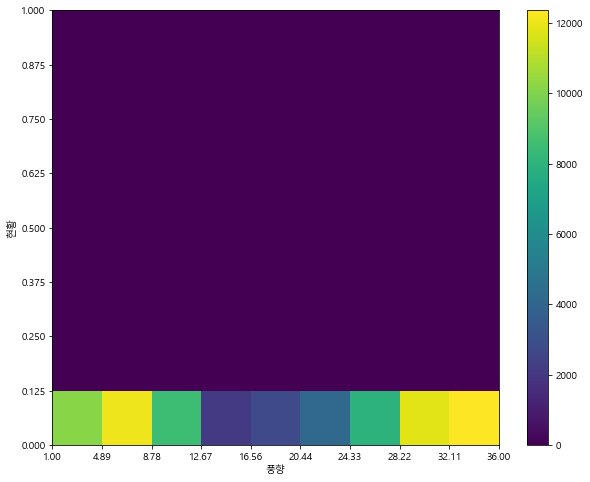

In [26]:
x = flight.풍향
y = flight.현황

fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111)

c = ax.hist2d(x, y, bins = [9, 8],
             range = [(1, 36), (0, 1)])

ax.set_xlabel("풍향")
ax.set_ylabel("현황")
ax.set_xticks(c[1])
ax.set_yticks(c[2])

fig.colorbar(c[3], ax = ax)
plt.show()

정상 출발했을 때의 데이터 분석 결과, 4.89 ~ 8.78, 32.11 ~ 36의 빈도수가 높게 나타났다.<br>
제주 지역은 4.89 ~ 8.78, 32.11 ~ 36 범위의 풍향이 자주 나타난다. 

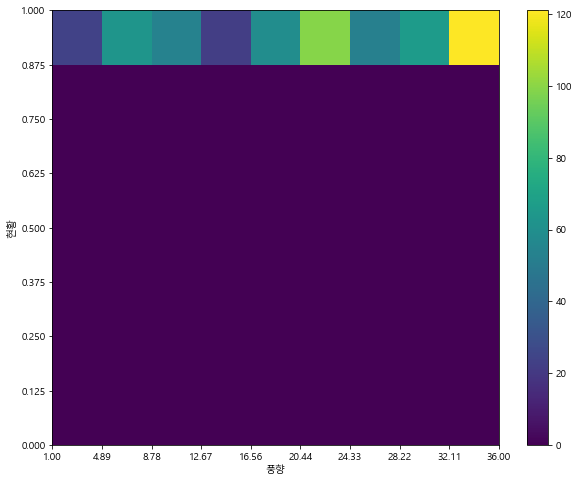

In [15]:
x = cancel.풍향
y = cancel.현황

fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111)

c = ax.hist2d(x, y, bins = [9, 8],
             range = [(1, 36), (0, 1)])

ax.set_xlabel("풍향")
ax.set_ylabel("현황")
ax.set_xticks(c[1])
ax.set_yticks(c[2])

fig.colorbar(c[3], ax = ax)
plt.show()

결항 데이터만으로 현황 - 풍향 데이터 간의 상관관계를 히트맵으로 나타냈다. <br>
풍향 32 ~ 36일 때 결항의 수가 많은 것을 알 수 있다. 

#### 풍속 데이터
* 출발한 항공편의 데이터를 상관관계 분석한 결과로는 정상 출발한 제주 지역의 기상 상황을 알 수 있다.  

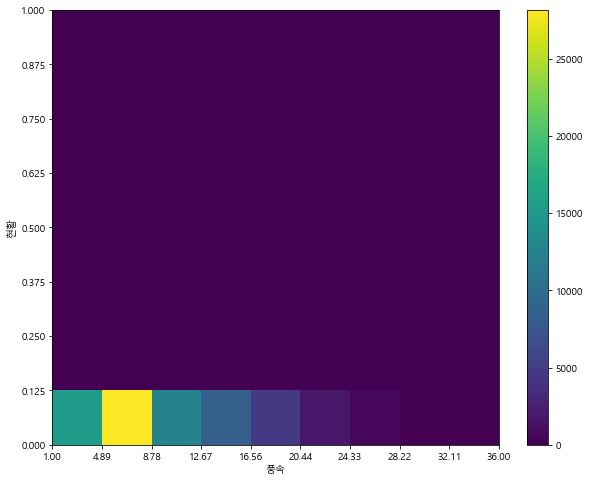

In [27]:
x = flight.풍속
y = flight.현황

fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111)

c = ax.hist2d(x, y, bins = [9, 8],
             range = [(1, 36), (0, 1)])

ax.set_xlabel("풍속")
ax.set_ylabel("현황")
ax.set_xticks(c[1])
ax.set_yticks(c[2])

fig.colorbar(c[3], ax = ax)
plt.show()

정상 출발한 항공편의 데이터를 분석한 결과, 제주 지역은 4.89 ~ 8.78 범위의 풍속의 빈도수가 높게 나타났다. 

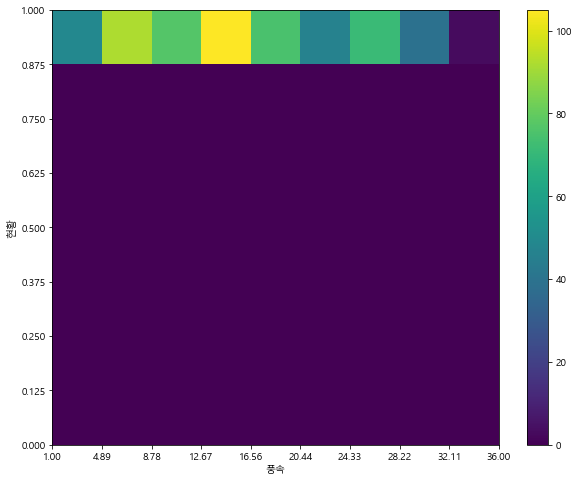

In [17]:
x = cancel.풍속
y = cancel.현황

fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111)

c = ax.hist2d(x, y, bins = [9, 8],
             range = [(1, 36), (0, 1)])

ax.set_xlabel("풍속")
ax.set_ylabel("현황")
ax.set_xticks(c[1])
ax.set_yticks(c[2])

fig.colorbar(c[3], ax = ax)
plt.show()

풍속 데이터 상관관계 분석 결과, 풍속이 12.67 ~ 16.56인 경우에 결항이 많이 발생했다. <br>
풍속의 수치가 높으면 결항이 발생할 확률이 높을 것이라는 가설은 기각되었다. 

#### 전운량 데이터
* 출발한 항공편의 데이터를 상관관계 분석한 결과로는 정상 출발한 제주 지역의 기상 상황을 알 수 있다.  

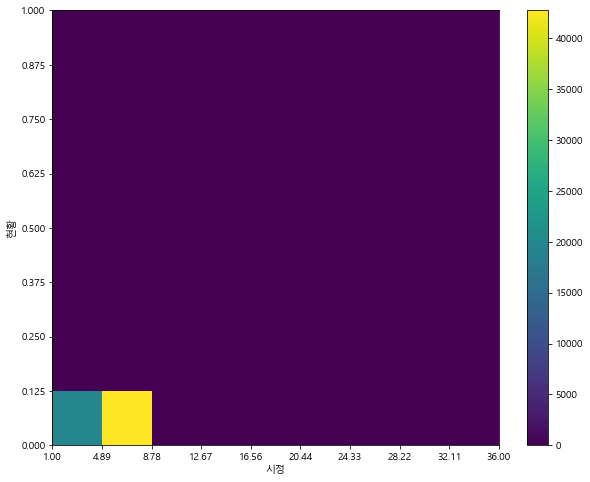

In [29]:
x = flight.전운량
y = flight.현황

fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111)

c = ax.hist2d(x, y, bins = [9, 8],
             range = [(1, 36), (0, 1)])

ax.set_xlabel("시정")
ax.set_ylabel("현황")
ax.set_xticks(c[1])
ax.set_yticks(c[2])

fig.colorbar(c[3], ax = ax)
plt.show()

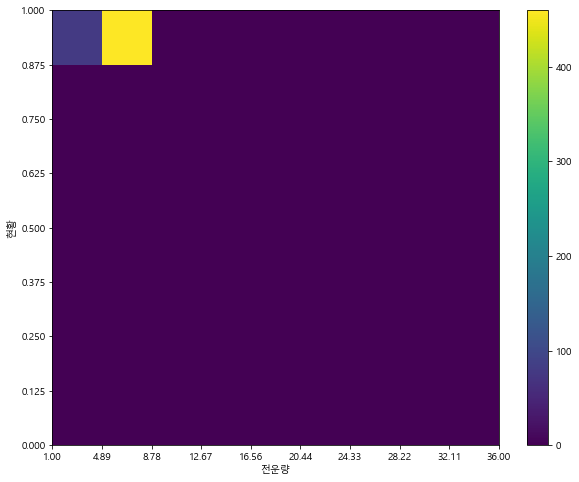

In [30]:
x = cancel.전운량
y = cancel.현황

fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111)

c = ax.hist2d(x, y, bins = [9, 8],
             range = [(1, 36), (0, 1)])

ax.set_xlabel("전운량")
ax.set_ylabel("현황")
ax.set_xticks(c[1])
ax.set_yticks(c[2])

fig.colorbar(c[3], ax = ax)
plt.show()

전운량 데이터 상관관계 분석 결과, 시정이 4.89 ~ 8.78일 경우 결항이 많이 발생한다. <br>
위의 분석으로 제주 지역의 전운량이 낮은 경향을 보이는 것을 알 수 있었으므로 전운량이 낮을수록 결항이 많이 발생한다고 단정 지을 수는 없다.  

#### 최저운고 데이터
* 출발한 항공편의 데이터를 상관관계 분석한 결과로는 정상 출발한 제주 지역의 기상 상황을 알 수 있다.  

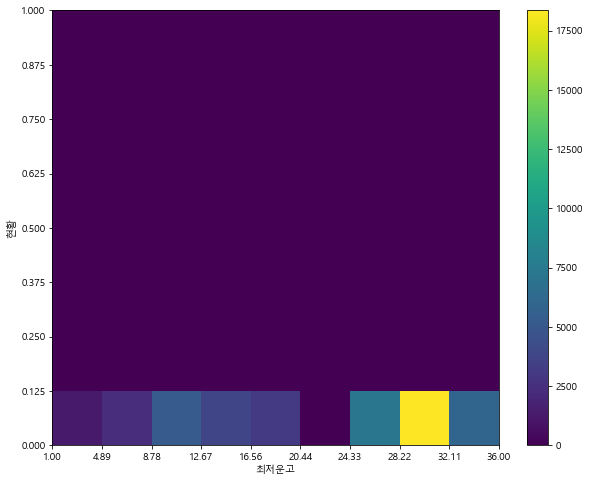

In [31]:
x = flight.최저운고
y = flight.현황

fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111)

c = ax.hist2d(x, y, bins = [9, 8],
             range = [(1, 36), (0, 1)])

ax.set_xlabel("최저운고")
ax.set_ylabel("현황")
ax.set_xticks(c[1])
ax.set_yticks(c[2])

fig.colorbar(c[3], ax = ax)
plt.show()

정상 운항한 항공편 데이터 분석 결과, 28.22 ~ 32.11 범위의 최저운고가 자주 나타나는 것을 알 수 있다. 

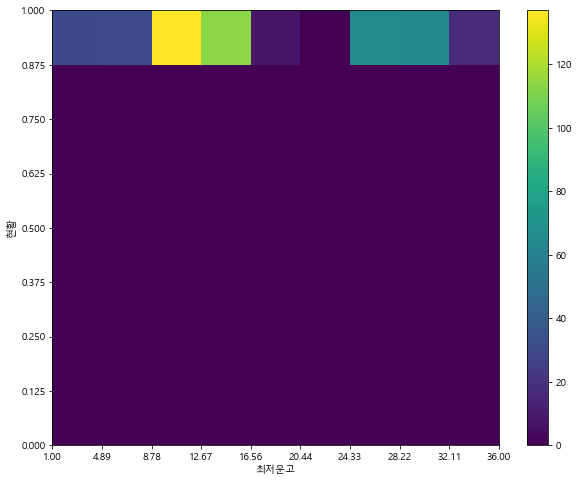

In [21]:
x = cancel.최저운고
y = cancel.현황

fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111)

c = ax.hist2d(x, y, bins = [9, 8],
             range = [(1, 36), (0, 1)])

ax.set_xlabel("최저운고")
ax.set_ylabel("현황")
ax.set_xticks(c[1])
ax.set_yticks(c[2])

fig.colorbar(c[3], ax = ax)
plt.show()

최저운고 데이터 상관관계 분석 결과, 최저운고가 8.78 ~ 12.67일 경우에 결항이 많이 발생한다. <br>
제주지역의 최저운고는 28.22 ~ 32.11 범위가 자주 나타나기 때문에 결항 시의 최저운고 경향과는 다르다.<br>
따라서, 최저운고가 낮을수록(구름의 높이가 낮을수록) 결항이 많이 발생한다는 결론을 내릴 수 있다. 

#### 기온 데이터
* 출발한 항공편의 데이터를 상관관계 분석한 결과로는 정상 출발한 제주 지역의 기상 상황을 알 수 있다.  

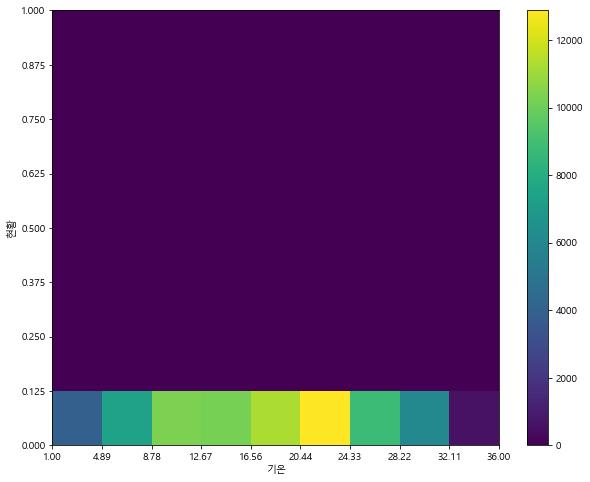

In [32]:
x = flight.기온
y = flight.현황

fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111)

c = ax.hist2d(x, y, bins = [9, 8],
             range = [(1, 36), (0, 1)])

ax.set_xlabel("기온")
ax.set_ylabel("현황")
ax.set_xticks(c[1])
ax.set_yticks(c[2])

fig.colorbar(c[3], ax = ax)
plt.show()

정상 출발한 항공편 데이터의 분석 결과, 제주 지역의 기온은 20.44 ~ 24.33 범위에 속하는 경우가 많다는 결론을 내릴 수 있다. 

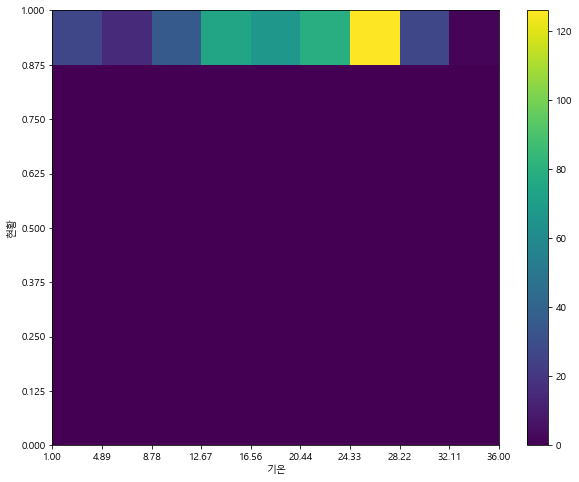

In [22]:
x = cancel.기온
y = cancel.현황

fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111)

c = ax.hist2d(x, y, bins = [9, 8],
             range = [(1, 36), (0, 1)])

ax.set_xlabel("기온")
ax.set_ylabel("현황")
ax.set_xticks(c[1])
ax.set_yticks(c[2])

fig.colorbar(c[3], ax = ax)
plt.show()

기온 데이터 상관관계 분석 결과, 기온이 24.33 ~ 28.22 범위에서 결항이 많이 발생한다는 것을 알 수 있다. <br>
제주 지역은 20.44 ~ 24.33 범위를 가지는 경향이 있으므로, 빈도수가 높은 범위보다는 높은 기온이 나타나야 결항할 확률이 높다는 것을 의미한다. 

#### 강수량 데이터
* 출발한 항공편의 데이터를 상관관계 분석한 결과로는 정상 출발한 제주 지역의 기상 상황을 알 수 있다.  

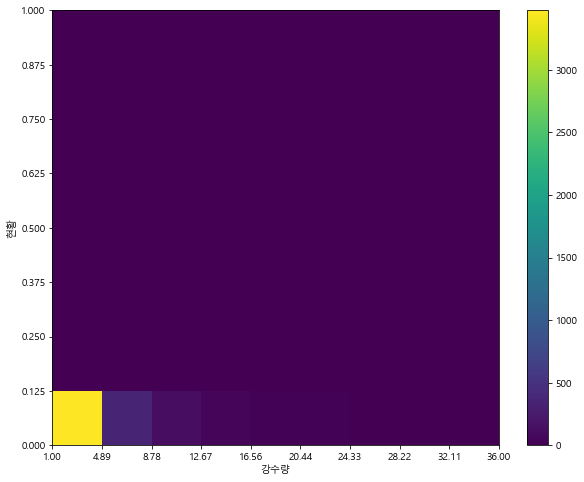

In [33]:
x = flight.강수량
y = flight.현황

fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111)

c = ax.hist2d(x, y, bins = [9, 8],
             range = [(1, 36), (0, 1)])

ax.set_xlabel("강수량")
ax.set_ylabel("현황")
ax.set_xticks(c[1])
ax.set_yticks(c[2])

fig.colorbar(c[3], ax = ax)
plt.show()

정상 출발한 항공편의 데이터 분석 결과, 제주 지역은 1 ~ 4.89 범위의 강수량이 많이 나타나는 경향을 보인다.

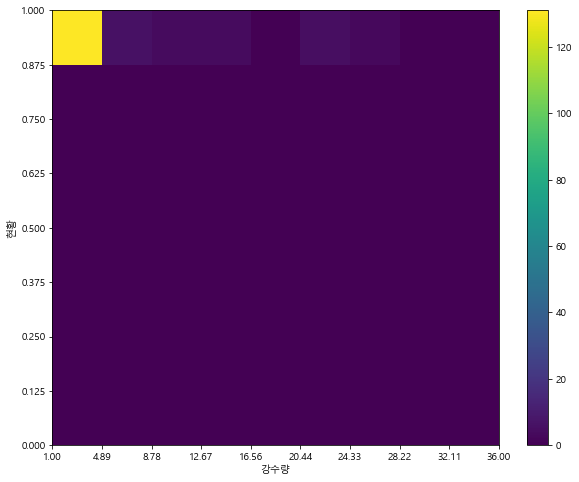

In [35]:
x = cancel.강수량
y = cancel.현황

fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111)

c = ax.hist2d(x, y, bins = [9, 8],
             range = [(1, 36), (0, 1)])

ax.set_xlabel("강수량")
ax.set_ylabel("현황")
ax.set_xticks(c[1])
ax.set_yticks(c[2])

fig.colorbar(c[3], ax = ax)
plt.show()

강수량 데이터 분석 결과, 위의 분석과 같이 1 ~ 4.89 범위에서 결항이 많이 발생한다. <br>
제주 지역의 기상 경향을 따라가므로 '강수량이 높을수록 결항 확률이 높을 것이다'라는 가설은 기각되었다. 

#### 적설 데이터
* 출발한 항공편의 데이터를 상관관계 분석한 결과로는 정상 출발한 제주 지역의 기상 상황을 알 수 있다.  

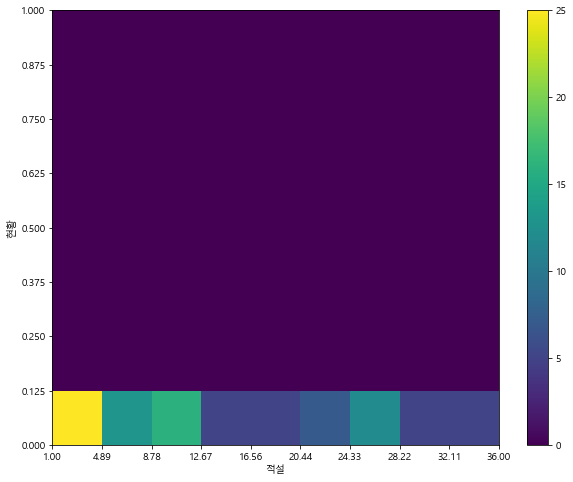

In [36]:
x = flight.적설
y = flight.현황

fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111)

c = ax.hist2d(x, y, bins = [9, 8],
             range = [(1, 36), (0, 1)])

ax.set_xlabel("적설")
ax.set_ylabel("현황")
ax.set_xticks(c[1])
ax.set_yticks(c[2])

fig.colorbar(c[3], ax = ax)
plt.show()

정상 출발한 항공편 데이터 분석 결과, 적설 데이터가 1 ~ 4.89 범위에 많이 속하는 경향을 보인다. 

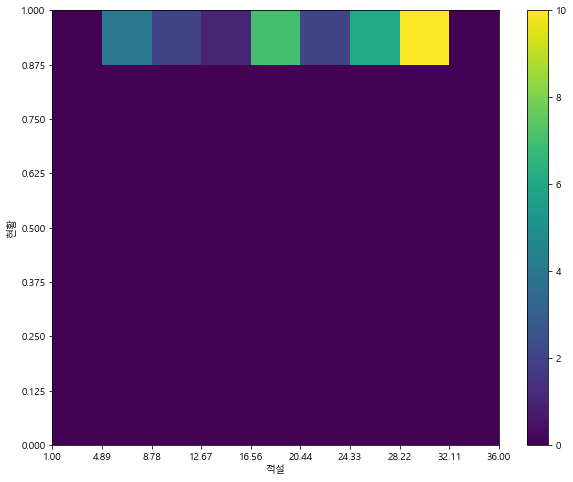

In [38]:
x = cancel.적설
y = cancel.현황

fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111)

c = ax.hist2d(x, y, bins = [9, 8],
             range = [(1, 36), (0, 1)])

ax.set_xlabel("적설")
ax.set_ylabel("현황")
ax.set_xticks(c[1])
ax.set_yticks(c[2])

fig.colorbar(c[3], ax = ax)
plt.show()

적설 데이터 분석 결과, 적설 데이터가 28.22 ~ 32.11 범위에 결항이 많이 분포하는 경향을 보인다. <br>
적설이 커질수록(눈이 많이 내릴수록) 결항 확률이 높다는 것을 의미한다.

#### 신적설 데이터
* 출발한 항공편의 데이터를 상관관계 분석한 결과로는 정상 출발한 제주 지역의 기상 상황을 알 수 있다.  

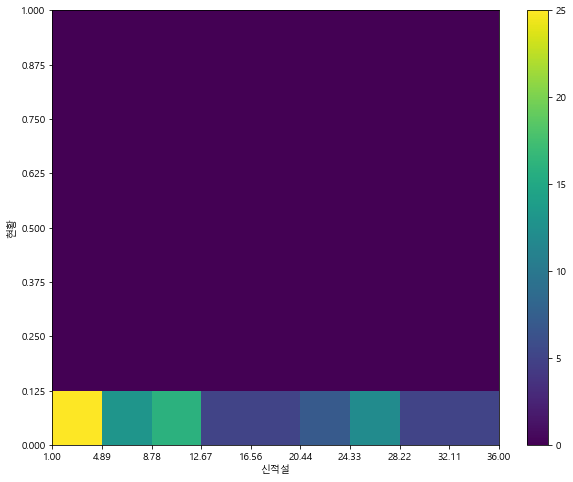

In [40]:
x = flight.신적설
y = flight.현황

fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111)

c = ax.hist2d(x, y, bins = [9, 8],
             range = [(1, 36), (0, 1)])

ax.set_xlabel("신적설")
ax.set_ylabel("현황")
ax.set_xticks(c[1])
ax.set_yticks(c[2])

fig.colorbar(c[3], ax = ax)
plt.show()

정상 출발한 항공편 데이터 분석 결과, 신적설 데이터가 1 ~ 4.89 범위에 많이 속하는 경향을 보인다. 

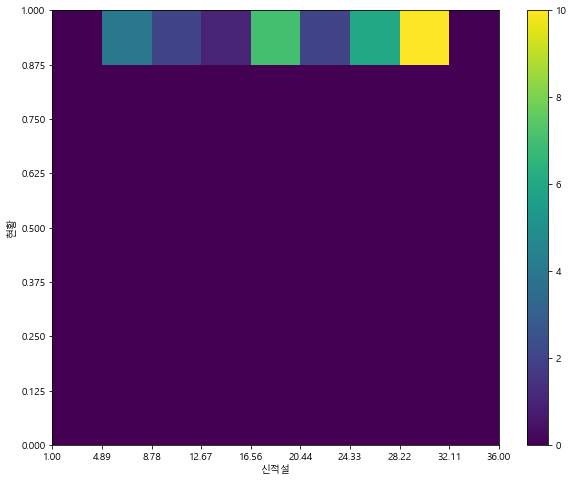

In [42]:
x = cancel.신적설
y = cancel.현황

fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111)

c = ax.hist2d(x, y, bins = [9, 8],
             range = [(1, 36), (0, 1)])

ax.set_xlabel("신적설")
ax.set_ylabel("현황")
ax.set_xticks(c[1])
ax.set_yticks(c[2])

fig.colorbar(c[3], ax = ax)
plt.show()

적설 데이터 분석 결과, 신적설 데이터가 28.22 ~ 32.11 범위에 결항이 많이 분포하는 경향을 보인다. <br>
신적설이 커질수록(눈이 많이 내릴수록, 쌓이는 눈이 많을수록) 결항 확률이 높다는 것을 의미한다.